## Import necessary libraries

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

Import ecommerce 'data.csv' file and a bit of information about the dataset

In [3]:
ecom=pd.read_csv('data.csv',encoding="ISO-8859-1",
                 dtype={'CustomerID': str,'InvoiceID': str})
ecom.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
28644,538652,72802B,OCEAN SCENT CANDLE IN JEWELLED BOX,1,12/13/2010 15:12,4.25,17890,United Kingdom
478275,577078,22024,RAINY LADIES BIRTHDAY CARD,1,11/17/2011 15:17,0.83,NaN,United Kingdom
243899,558475,22251,BIRDHOUSE DECORATION MAGIC GARDEN,30,6/29/2011 15:58,0.83,NaN,United Kingdom
187545,552978,22900,SET 2 TEA TOWELS I LOVE LONDON,24,5/12/2011 14:46,2.95,12590,Germany
65537,541696,21221,SET/4 BADGES CUTE CREATURES,1,1/20/2011 18:08,0.83,NaN,United Kingdom


In [4]:
ecom.shape

(541909, 8)

In [5]:
ecom.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [6]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


## Inspect and Handle Missing values, duplicates, and outliers

In [7]:
ecom.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Here, we see that CustomerID and Description have null values. Description is not as important for now, so we leave it be.

CustomerID is the key value to identify the customers, so we delete all the CustomerIds whose value is null.

In [8]:
ecom.dropna(subset=['CustomerID'],axis=0,inplace=True)
ecom.shape

(406829, 8)

In [9]:
ecom.drop_duplicates(inplace=True)
ecom.shape

(401604, 8)

## Number of customers per Country

In [10]:
country_counts = ecom['Country'].value_counts()
print(country_counts.sort_values(ascending=True))

Saudi Arabia                10
Bahrain                     17
Czech Republic              30
Brazil                      32
Lithuania                   35
Lebanon                     45
RSA                         58
European Community          61
United Arab Emirates        68
Malta                      127
Greece                     146
Canada                     151
Iceland                    182
Singapore                  229
Unspecified                241
Israel                     247
USA                        291
Poland                     341
Japan                      358
Denmark                    389
Austria                    401
Sweden                     461
Cyprus                     611
Finland                    695
Channel Islands            757
Italy                      803
Norway                    1086
Australia                 1258
Portugal                  1471
Switzerland               1877
Belgium                   2069
Netherlands               2371
Spain   

## Total no. of products

In [11]:
ecom['StockCode'].nunique()

3684

## Which was the most sold Product?

In [12]:
value_counts = ecom['StockCode'].value_counts()
value_counts

85123A    2065
22423     1894
85099B    1659
47566     1409
84879     1405
          ... 
90104        1
90135        1
90027D       1
90027A       1
84746        1
Name: StockCode, Length: 3684, dtype: int64

In [13]:
mode_values = ecom['StockCode'].mode()
for mode in mode_values:
    frequency = value_counts[mode]
    print(f"The most sold product {mode} was sold {frequency} times")

The most sold product 85123A was sold 2065 times


In [14]:
ecom['StockCode'].mode()

0    85123A
Name: StockCode, dtype: object

## Which was the least sold product?

In [15]:
least_val = value_counts.idxmin()
least_val_count = value_counts.min()
print(f"The least sold product {least_val} was sold {least_val_count} times")

The least sold product 90125E was sold 1 times


In [16]:
value_counts.idxmin()

'90125E'

## No. of Customers

In [17]:
ecom['CustomerID'].nunique()

4372

## How many succesful transactions were there and how many transactions was cancelled?

In [18]:
sample = ecom[ecom['InvoiceNo'].astype(str).str.len() != 6].copy()
sample

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315,United Kingdom


Here, the InvoiceNo. starting from C are all cancelled transaction. Hence, we can differentiate the succesful and cancelled transactions by follows:

In [19]:
s_tr = 0
c_tr = 0
for i in ecom['InvoiceNo']:
    if len(i) == 6:
        s_tr += 1
    elif i[0] == 'C' :
        c_tr += 1
print(f"No. of succesful transactions : {s_tr}")
print(f"No. of cancelled transactions : {c_tr}")

No. of succesful transactions : 392732
No. of cancelled transactions : 8872


## Which day had the maximum number of transactions?

In [22]:
ecom.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
285787,561923,22456,NATURAL SLATE CHALKBOARD LARGE,3,8/1/2011 12:16,4.95,14112,United Kingdom
389311,570466,23372,SET 36 COLOUR PENCILS DOLLY GIRL,3,10/10/2011 16:03,1.25,16791,United Kingdom
425518,573328,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,2,10/30/2011 11:09,3.95,16601,United Kingdom
185663,552823,85132B,CHARLIE AND LOLA TABLE TINS,2,5/11/2011 13:06,1.95,14731,United Kingdom
197336,553897,46000U,POLYESTER FILLER PAD 30CMx30CM,2,5/19/2011 17:23,1.25,14911,EIRE


In [23]:
ecom['InvoiceDate'] = pd.to_datetime(ecom['InvoiceDate'])
ecom.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [25]:
transactions_per_day = ecom.groupby(pd.Grouper(key='InvoiceDate', freq='D')).size()
transactions_per_day.head()

InvoiceDate
2010-12-01    1924
2010-12-02    2003
2010-12-03    1100
2010-12-04       0
2010-12-05    2619
Freq: D, dtype: int64

In [27]:
max_transactions = transactions_per_day.max()
max_transactions

3359

In [29]:
max_transactions_df = transactions_per_day[transactions_per_day == max_transactions].reset_index()
print(f'Hence the maximum transaction per day is :')
print(max_transactions_df)

Hence the maximum transaction per day is :
  InvoiceDate     0
0  2011-12-05  3359


## Which year had the maximum number of transactions?

In [30]:
ecom.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
246510,558704,21890,S/6 WOODEN SKITTLES IN COTTON BAG,12,2011-07-01 12:50:00,3.25,17505,United Kingdom
369117,569014,22577,WOODEN HEART CHRISTMAS SCANDINAVIAN,26,2011-09-30 09:05:00,0.29,18053,United Kingdom
506974,579163,22866,HAND WARMER SCOTTY DOG DESIGN,96,2011-11-28 13:59:00,1.85,15838,United Kingdom
395998,571054,22188,BLACK HEART CARD HOLDER,1,2011-10-13 13:58:00,3.95,14234,United Kingdom
437251,574278,23108,SET OF 10 LED DOLLY LIGHTS,2,2011-11-03 14:42:00,6.25,15814,United Kingdom


In [32]:
transactions_per_year = ecom.groupby(pd.Grouper(key='InvoiceDate',freq='Y')).size()
transactions_per_year

InvoiceDate
2010-12-31     26354
2011-12-31    375250
Freq: A-DEC, dtype: int64

In [34]:
max_transactions = transactions_per_year.max()
max_transactions

375250

In [41]:
max_transactions_df = transactions_per_year[transactions_per_year == max_transactions].reset_index()
print(f"Hence the maximum transactions per year is \n {max_transactions_df}")

Hence the maximum transactions per year is 
   InvoiceDate       0
0  2011-12-31  375250


## Which product got cancelled the maximum number of times?

In [52]:
ecom.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
345089,567142,21731,RED TOADSTOOL LED NIGHT LIGHT,36,2011-09-16 14:55:00,1.65,14262,United Kingdom
340843,566721,22561,WOODEN SCHOOL COLOURING SET,12,2011-09-14 12:50:00,1.65,12921,United Kingdom
398905,571265,22866,HAND WARMER SCOTTY DOG DESIGN,2,2011-10-16 11:31:00,2.10,16674,United Kingdom
533877,581122,23076,ICE CREAM SUNDAE LIP GLOSS,24,2011-12-07 12:33:00,1.25,12839,United Kingdom
168248,551014,22399,MAGNETS PACK OF 4 CHILDHOOD MEMORY,12,2011-04-26 11:04:00,1.25,13209,United Kingdom


In [54]:
cancelled_trans = ecom[ecom['InvoiceNo'].str.startswith('C')]
cancelled_trans.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom


In [55]:
cancelled_products = cancelled_trans.groupby('StockCode').size()
cancelled_products.head()

StockCode
10133    1
10135    1
11001    5
15034    4
15036    4
dtype: int64

In [57]:
max_cancelled_product = cancelled_products.max()
max_cancelled_product

180

In [62]:
max_cancelled_product_df = cancelled_products[cancelled_products == max_cancelled_product]
print(f"Hence, the maximum number of cancelled product is: \n {max_cancelled_product_df}")

Hence, the maximum number of cancelled product is: 
 StockCode
22423    180
dtype: int64


## Most Sold Product

In [63]:
ecom.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
467089,576339,22246,MAGIC GARDEN FELT GARLAND,2,2011-11-14 15:27:00,4.13,14096,United Kingdom
527653,580727,21880,RED RETROSPOT TAPE,2,2011-12-05 17:17:00,0.42,14096,United Kingdom
296496,562912,22476,EMPIRE UNION JACK TV DINNER TRAY,1,2011-08-10 13:15:00,4.95,15311,United Kingdom
121529,546770,22797,CHEST OF DRAWERS GINGHAM HEART,1,2011-03-16 15:17:00,16.95,12523,France
72745,542258,21121,SET/10 RED POLKADOT PARTY CANDLES,3,2011-01-26 17:08:00,1.25,17372,United Kingdom


In [71]:
quantity_sold = ecom.groupby('StockCode')['Quantity'].sum()
max_quantity_sold = quantity_sold.max()
max_quantity_sold_df = quantity_sold[quantity_sold == max_quantity_sold]
print(f"Hence, the maximum number of cancelled product is: \n {max_quantity_sold_df}")

Hence, the maximum number of cancelled product is: 
 StockCode
84077    53119
Name: Quantity, dtype: int64


## Which product was sold how many times?

In [72]:
ecom.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
464783,576181,21154,RED RETROSPOT OVEN GLOVE,1,2011-11-14 11:19:00,1.25,15572,United Kingdom
8260,537131,21034,REX CASH+CARRY JUMBO SHOPPER,2,2010-12-05 12:26:00,0.95,15716,United Kingdom
86873,543610,16161P,WRAP ENGLISH ROSE,25,2011-02-10 14:30:00,0.42,16425,United Kingdom
329828,565855,22537,MAGIC DRAWING SLATE DINOSAUR,24,2011-09-07 13:30:00,0.42,15114,United Kingdom
537869,581358,22300,COFFEE MUG DOG + BALL DESIGN,6,2011-12-08 12:30:00,2.55,17436,United Kingdom


In [76]:
product_sold = ecom.groupby('StockCode').size()
product_sold.sort_values(ascending=False).head(5)

StockCode
85123A    2065
22423     1894
85099B    1659
47566     1409
84879     1405
dtype: int64

## Total Sales by date

In [79]:
daily_sales = ecom.groupby(pd.Grouper(key='InvoiceDate',freq='M'))['Quantity'].sum()
daily_sales.head()

InvoiceDate
2010-12-31    295177
2011-01-31    268755
2011-02-28    262243
2011-03-31    343095
2011-04-30    277730
Freq: M, Name: Quantity, dtype: int64

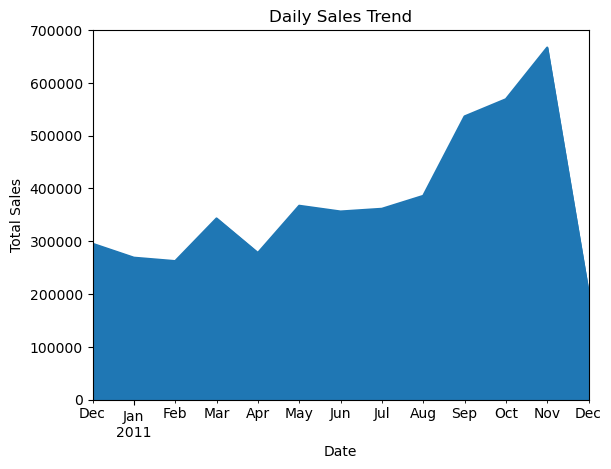

In [81]:
daily_sales.plot(kind='area', stacked=True)
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

## Which is the most expensive product?

In [82]:
ecom.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
399023,571269,47590B,PINK HAPPY BIRTHDAY BUNTING,1,2011-10-16 12:09:00,5.45,16243,United Kingdom
95237,544450,47559B,TEA TIME OVEN GLOVE,5,2011-02-20 12:23:00,1.25,17811,United Kingdom
494952,578285,22382,LUNCH BAG SPACEBOY DESIGN,1,2011-11-23 13:57:00,1.65,12748,United Kingdom
2314,536576,21156,RETROSPOT CHILDRENS APRON,12,2010-12-01 16:11:00,1.65,13777,United Kingdom
456924,575726,48173C,DOORMAT BLACK FLOCK,1,2011-11-10 19:12:00,8.25,16791,United Kingdom


In [87]:
unit_price = ecom.UnitPrice.unique()
unit_price.max()

38970.0

In [91]:
unit_price_df = ecom[ecom.UnitPrice == unit_price.max()]
unit_price_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.0,15098,United Kingdom


## Which customer ordered how many number of times?

In [92]:
ecom.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
160569,550464,22367,CHILDRENS APRON SPACEBOY DESIGN,3,2011-04-18 13:30:00,1.95,16550,United Kingdom
43410,540033,22644,CERAMIC CHERRY CAKE MONEY BANK,4,2011-01-04 14:12:00,1.45,13680,United Kingdom
269191,560437,23322,LARGE WHITE HEART OF WICKER,6,2011-07-18 16:05:00,2.95,13940,United Kingdom
521245,580351,22083,PAPER CHAIN KIT RETROSPOT,12,2011-12-02 15:55:00,2.95,12962,United Kingdom
438914,574341,21066,VINTAGE RED MUG,432,2011-11-04 10:09:00,0.80,18102,United Kingdom


In [98]:
customer_transactions=ecom.groupby('CustomerID')['InvoiceNo'].nunique()
customer_transactions.sort_values(ascending=False).head(5)

CustomerID
14911    248
12748    224
17841    169
14606    128
13089    118
Name: InvoiceNo, dtype: int64

## How many unique products were bought by each customers?

In [101]:
unique_product = ecom.groupby('CustomerID')['StockCode'].nunique()
unique_product.sort_values(ascending = False).head()

CustomerID
14911    1794
12748    1769
17841    1331
14096    1121
14298     884
Name: StockCode, dtype: int64

## Which customer had the most cancelled transactions?

In [103]:
ecom.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
32628,539098,22851,SET 20 NAPKINS FAIRY CAKES DESIGN,12,2010-12-16 10:28:00,0.85,14841,United Kingdom
179115,552262,21469,POLKA DOT RAFFIA FOOD COVER,6,2011-05-08 11:37:00,3.75,14911,EIRE
495303,578299,23144,ZINC T-LIGHT HOLDER STARS SMALL,24,2011-11-23 14:53:00,0.83,16660,United Kingdom
398324,571235,85099B,JUMBO BAG RED RETROSPOT,20,2011-10-14 14:37:00,2.08,15078,United Kingdom
131589,547572,21535,RED RETROSPOT SMALL MILK JUG,6,2011-03-24 10:03:00,2.55,13512,United Kingdom


In [114]:
canc_tra = cancelled_trans.groupby('CustomerID')['InvoiceNo'].count()
canc = canc_tra.sort_values(ascending=False)
print(f'Hence, {canc.head(1)} had the maximum number of cancellations')

Hence, CustomerID
14911    226
Name: InvoiceNo, dtype: int64 had the maximum number of cancellations


## Which customer had the most successful transactions?

In [115]:
ecom.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
372564,569246,21974,SET OF 36 PAISLEY FLOWER DOILIES,1,2011-10-03 09:57:00,2.92,14096,United Kingdom
76562,542629,22746,POPPY'S PLAYHOUSE LIVINGROOM,12,2011-01-31 09:57:00,2.10,12731,France
407390,571883,21034,REX CASH+CARRY JUMBO SHOPPER,2,2011-10-19 13:58:00,0.95,14704,United Kingdom
293080,562576,47566,PARTY BUNTING,3,2011-08-07 13:08:00,4.95,15518,United Kingdom
197489,553912,23203,JUMBO BAG DOILEY PATTERNS,30,2011-05-19 19:32:00,1.95,15122,United Kingdom


In [116]:
print(f"The customer {customer_transactions.idxmax()} is having most number of orders with {customer_transactions.max()} transactions.")

The customer 14911 is having most number of orders with 248 transactions.


# Data Preprocessing

In [123]:
ecom.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
420394,572892,22992,REVOLVER WOODEN RULER,36,2011-10-26 14:20:00,1.95,17017,United Kingdom
415520,572542,21889,WOODEN BOX OF DOMINOES,12,2011-10-24 16:20:00,1.25,17272,United Kingdom
494365,578270,21990,MODERN FLORAL STATIONERY SET,12,2011-11-23 13:39:00,2.46,14096,United Kingdom
472013,576663,47566,PARTY BUNTING,4,2011-11-16 11:31:00,4.95,16157,United Kingdom
498064,578509,21429,RED GINGHAM ROSE JEWELLERY BOX,8,2011-11-24 13:17:00,1.95,12705,Germany


In [128]:
ecom_df = ecom[['CustomerID','Quantity', 'UnitPrice']].copy()
ecom_df.loc[:, 'Total_Amt'] = ecom_df['Quantity'] * ecom_df['UnitPrice']
ecom_df.head()

,CustomerID,Quantity,UnitPrice,Total_Amt
0,17850,6,2.55,15.30
1,17850,6,3.39,20.34
2,17850,8,2.75,22.00
3,17850,6,3.39,20.34
4,17850,6,3.39,20.34


In [130]:
customer_total_spent = ecom_df.groupby('CustomerID')['Total_Amt'].sum()
customer_total_spent = customer_total_spent.reset_index()
customer_total_spent.columns=['CustomerID','Amt']
customer_total_spent.head()

,CustomerID,Amt
0,12346,0.00
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


In [135]:
frequency = ecom.groupby('CustomerID')['InvoiceNo'].count()
frequency = frequency.reset_index()
frequency.columns = ['CustomerID','Frequency']
frequency.head()

,CustomerID,Frequency
0,12346,2
1,12347,182
2,12348,31
3,12349,73
4,12350,17


In [136]:
ecom_cust=pd.merge(customer_total_spent,frequency,on='CustomerID',how='inner')
ecom_cust

,CustomerID,Amt,Frequency
0,12346,0.00,2
1,12347,4310.00,182
2,12348,1797.24,31
3,12349,1757.55,73
4,12350,334.40,17
...,...,...,...
4367,18280,180.60,10
4368,18281,80.82,7
4369,18282,176.60,13
4370,18283,2045.53,721


In [137]:
ecom_cust.describe()

,Amt,Frequency
count,4372.000000,4372.000000
mean,1893.531433,91.858188
std,8218.696204,229.223566
min,-4287.630000,1.000000
25%,291.795000,17.000000
50%,644.070000,41.000000
75%,1608.335000,99.250000
max,279489.020000,7812.000000


<AxesSubplot:xlabel='Frequency', ylabel='Amt'>

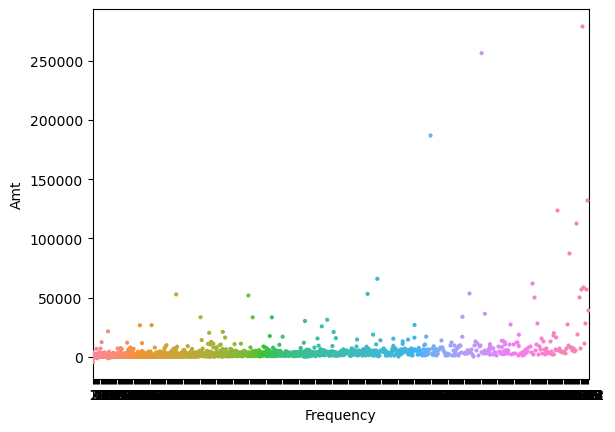

In [148]:
sn.stripplot(x='Frequency',y='Amt',data=ecom_cust, size=3)

In [149]:
import scipy.stats as sp

In [154]:
ecom_cust['Z-score']=np.abs((ecom_cust['Amt']-ecom_cust['Amt'].mean())
                            /ecom_cust['Amt'].std())
ecom_cust_amount=ecom_cust[ecom_cust['Z-score']<3].copy()
ecom_cust_amount.head()

,CustomerID,Amt,Frequency,Z-score
0,12346,0.00,2,0.230393
1,12347,4310.00,182,0.294021
2,12348,1797.24,31,0.011716
3,12349,1757.55,73,0.016545
4,12350,334.40,17,0.189705


In [155]:
ecom_cust_amount['Z-score_freq']=np.abs((ecom_cust_amount['Frequency']-
                                         ecom_cust_amount['Frequency'].mean())
                            /ecom_cust_amount['Frequency'].std())
ecom_cust_freq=ecom_cust_amount[ecom_cust_amount['Z-score_freq']<3]
ecom_cust_freq.head()

,CustomerID,Amt,Frequency,Z-score,Z-score_freq
0,12346,0.00,2,0.230393,0.633490
1,12347,4310.00,182,0.294021,0.776556
2,12348,1797.24,31,0.011716,0.406316
3,12349,1757.55,73,0.016545,0.077305
4,12350,334.40,17,0.189705,0.515986


In [157]:
train_data=ecom_cust_freq.copy()
train_data.head()

,CustomerID,Amt,Frequency,Z-score,Z-score_freq
0,12346,0.00,2,0.230393,0.633490
1,12347,4310.00,182,0.294021,0.776556
2,12348,1797.24,31,0.011716,0.406316
3,12349,1757.55,73,0.016545,0.077305
4,12350,334.40,17,0.189705,0.515986


In [158]:
train_data.drop(['Z-score','Z-score_freq'],axis=1,inplace=True)
train_data.head()

,CustomerID,Amt,Frequency
0,12346,0.00,2
1,12347,4310.00,182
2,12348,1797.24,31
3,12349,1757.55,73
4,12350,334.40,17


<AxesSubplot:xlabel='Frequency', ylabel='Amt'>

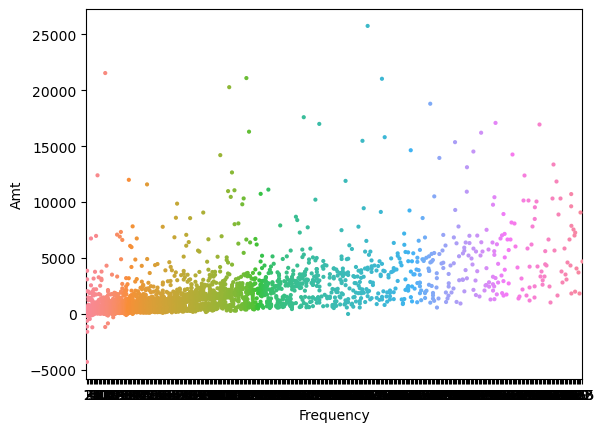

In [159]:
sn.stripplot(x='Frequency',y='Amt',data=train_data, size=3)

In [160]:
train_data.drop('CustomerID',axis=1,inplace=True)
train_data

,Amt,Frequency
0,0.00,2
1,4310.00,182
2,1797.24,31
3,1757.55,73
4,334.40,17
...,...,...
4366,173.90,9
4367,180.60,10
4368,80.82,7
4369,176.60,13


In [161]:
from sklearn.preprocessing import StandardScaler

In [163]:
std = StandardScaler()
std.fit_transform(train_data)
scaled_data = std.transform(train_data)
scaled_data

array([[-0.64864768, -0.83188612],
       [ 1.534251  ,  1.33747648],
       [ 0.26160587, -0.4823777 ],
       ...,
       [-0.60771453, -0.77162605],
       [-0.55920455, -0.69931396],
       [ 0.28188505, -0.01234914]])

In [165]:
scaled_data_df = pd.DataFrame(scaled_data, columns = train_data.columns)
scaled_data_df.head()

,Amt,Frequency
0,-0.648648,-0.831886
1,1.534251,1.337476
2,0.261606,-0.482378
3,0.241504,0.023807
4,-0.479283,-0.651106


In [170]:
scaled_data_df.shape

(4259, 2)

In [171]:
scaled_data_df.dropna(inplace=True)

In [172]:
scaled_data_df.shape

(4259, 2)

In [173]:
from sklearn.decomposition import PCA

In [174]:
pca = PCA(n_components = 2)
pca.fit_transform(scaled_data_df)
pca_data = pca.transform(scaled_data_df)
pca_data

array([[-1.04689549,  0.12956915],
       [ 2.03061797,  0.1391406 ],
       [-0.15610926,  0.52607583],
       ...,
       [-0.97534108,  0.11590295],
       [-0.88990697,  0.09907232],
       [ 0.19059067,  0.20805499]])

In [175]:
pca_data_df = pd.DataFrame(pca_data, columns = scaled_data_df.columns)
pca_data_df.head()

,Amt,Frequency
0,-1.046895,0.129569
1,2.030618,0.139141
2,-0.156109,0.526076
3,0.187603,0.153935
4,-0.799306,0.121497


In [177]:
pca_data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Amt,4259.0,6.913804e-17,1.272337,-2.590949,-0.791374,-0.472912,0.302031,10.023661
Frequency,4259.0,-4.219056e-17,0.617760,-3.111001,-0.121737,0.072027,0.144585,7.731445


In [178]:
pca.explained_variance_ratio_

array([0.80923112, 0.19076888])

In [179]:
pca.explained_variance_ratio_.cumsum()

array([0.80923112, 1.        ])

In [180]:
pca.components_[0].shape

(2,)

In [182]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

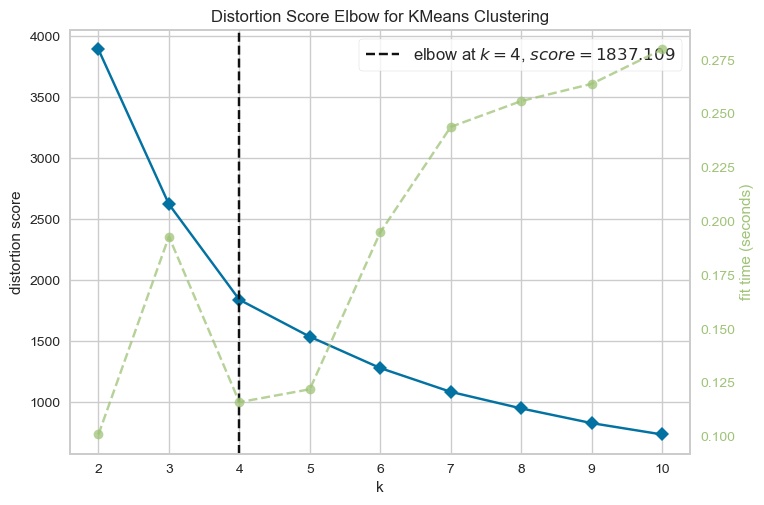

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [183]:
elbow_m = KElbowVisualizer(KMeans(),k=10)
elbow_m.fit(pca_data_df)
elbow_m.show()

In [184]:
from sklearn.cluster import AgglomerativeClustering
ag = AgglomerativeClustering(n_clusters=4)
ag.fit(pca_data_df)

AgglomerativeClustering(n_clusters=4)

In [186]:
labels=ag.labels_
labels

array([3, 0, 3, ..., 3, 3, 1], dtype=int64)

In [193]:
from sklearn.metrics import silhouette_samples,silhouette_score
print(silhouette_score(pca_data_df,labels,metric='euclidean'))
silhouette_avg = silhouette_score(pca_data,labels)

0.5225590940417593


In [194]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(pca_data_df,labels)

4170.839407901938

In [195]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(pca_data_df,labels)

0.8829740390689182

In [196]:
from scipy.cluster.hierarchy import dendrogram, linkage

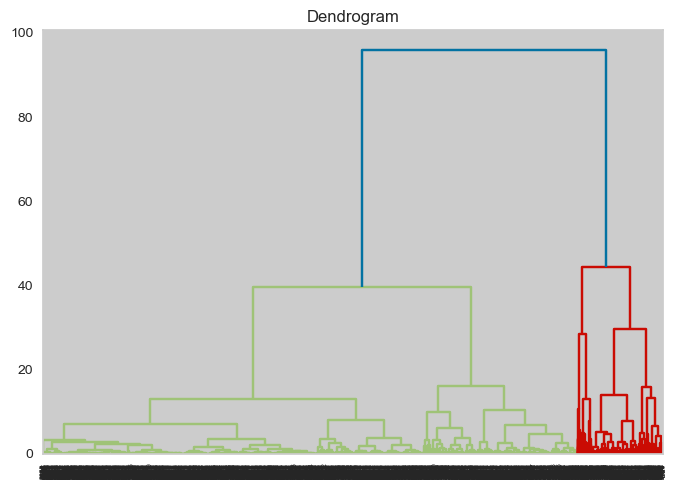

In [197]:
linked = linkage(pca_data_df,'ward')
dendrogram(linked)
plt.title('Dendrogram')
plt.show()

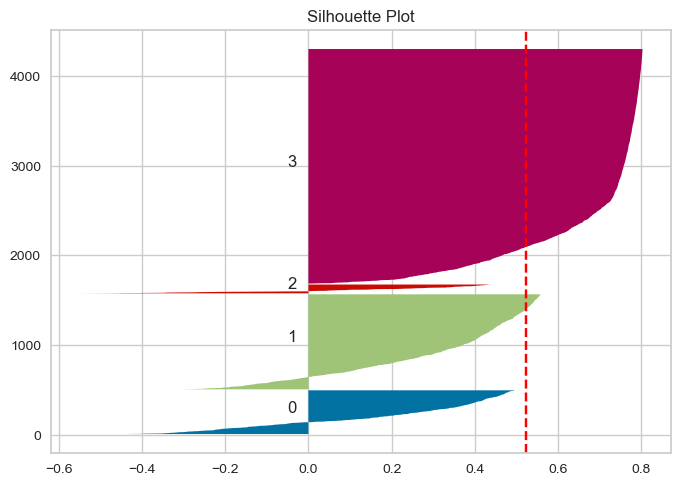

In [198]:
sample_silhouette_values = silhouette_samples(pca_data_df,labels)
y_lower=10
for i in range(4):
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10
plt.axvline(x=silhouette_avg,color="red",linestyle="--")
plt.title('Silhouette Plot')
plt.show()

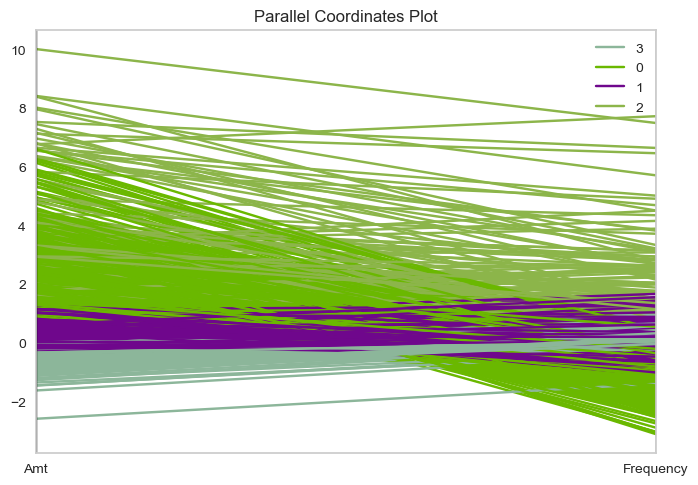

In [199]:
from pandas.plotting import parallel_coordinates
data = pd.DataFrame(pca_data_df)
data['cluster'] = labels
parallel_coordinates(data,'cluster')
plt.title('Parallel Coordinates Plot')
plt.show()

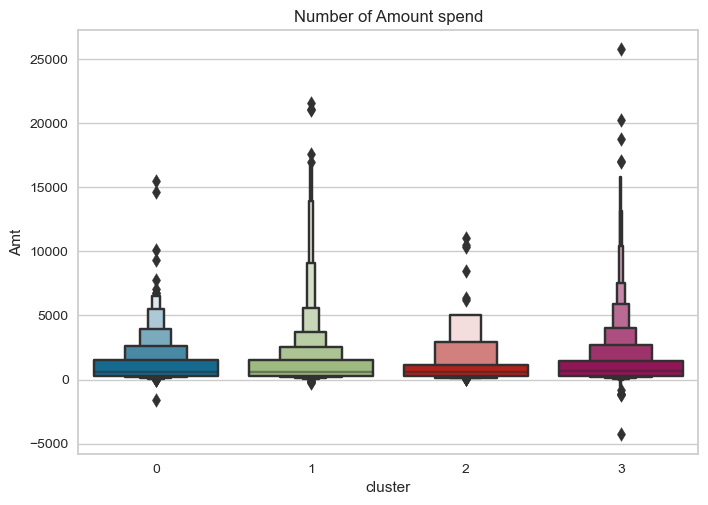

In [201]:
plt.figure()
pl=sn.boxenplot(x=data["cluster"],y=train_data["Amt"])
pl.set_title("Number of Amount spend")
plt.show()